In [2]:
import matplotlib as plt
import numpy as np
import numpy.random as npr
import pandas as pd

In [4]:
data = pd.read_csv('data/wage.csv')

In [6]:
data.head(10)

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
5,2008,54,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.115744
6,2009,44,2. Married,4. Other,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.133021,169.528538
7,2008,30,1. Never Married,3. Asian,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.716003,111.720849
8,2006,41,1. Never Married,2. Black,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.778151,118.884359
9,2004,52,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.857332,128.680488


In [10]:
data.tail(10)

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
2990,2009,50,2. Married,2. Black,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.886491,132.487821
2991,2003,26,1. Never Married,2. Black,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.778151,118.884359
2992,2007,35,2. Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.698970,109.833986
2993,2006,31,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.633468,102.870247
2994,2009,31,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.893207,133.380608
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033
2999,2009,55,5. Separated,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.505150,90.481913


In [14]:
num_rows = len(data)
print(num_rows)

3000


In [18]:
#Display metadata
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   logwage     3000 non-null   float64
 10  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 257.9+ KB


In [24]:
#Check data types of 2 columns
check = ['wage', 'education']
print(data[check].dtypes)

wage         float64
education     object
dtype: object


In [26]:
#column names
print(data.columns)

Index(['year', 'age', 'maritl', 'race', 'education', 'region', 'jobclass',
       'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')


In [28]:
data.index

RangeIndex(start=0, stop=3000, step=1)

In [30]:
data.size

33000

In [32]:
data.shape

(3000, 11)

In [36]:
descriptive = data[['age', 'wage']].describe()
print(descriptive)

               age         wage
count  3000.000000  3000.000000
mean     42.414667   111.703608
std      11.542406    41.728595
min      18.000000    20.085537
25%      33.750000    85.383940
50%      42.000000   104.921507
75%      51.000000   128.680488
max      80.000000   318.342430


In [34]:
descriptive_stats = data.groupby('race')[['age', 'wage']].describe()
print(descriptive_stats)

             age                                                         wage  \
           count       mean        std   min    25%   50%   75%   max   count   
race                                                                            
1. White  2480.0  42.394758  11.365655  18.0  34.00  42.0  51.0  80.0  2480.0   
2. Black   293.0  43.563140  13.012913  18.0  33.00  44.0  52.0  75.0   293.0   
3. Asian   190.0  41.821053  11.218823  22.0  32.25  40.0  50.0  76.0   190.0   
4. Other    37.0  37.702703  11.553895  21.0  28.00  39.0  47.0  65.0    37.0   

                                                                               \
                mean        std        min        25%         50%         75%   
race                                                                            
1. White  112.563666  41.733830  20.085537  86.695155  106.348256  130.042934   
2. Black  101.601177  37.162486  23.274704  81.283253   94.072715  117.146817   
3. Asian  120.288288  46.42

In [38]:
#The means here tell us Asian workers on average have the highest wages. The median says the true middle for all races is 104.92


In [40]:
reordered = data[['age', 'wage']]
reordered

,age,wage
0,18,75.043154
1,24,70.476020
2,45,130.982177
3,43,154.685293
4,50,75.043154
...,...,...
2995,44,154.685293
2996,30,99.689464
2997,27,66.229408
2998,27,87.981033


In [42]:
correlation = data['age'].corr(data['wage'])
correlation

0.1956372015635886

In [44]:
#These variables are not highly correlated. 

In [46]:
top_10_wage = data.nlargest(10, 'wage')
print(top_10_wage)

      year  age            maritl      race           education  \
206   2007   63        2. Married  2. Black  5. Advanced Degree   
1229  2007   46        2. Married  2. Black          2. HS Grad   
503   2003   38  1. Never Married  1. White     3. Some College   
1293  2009   38        2. Married  2. Black          2. HS Grad   
1112  2006   34  1. Never Married  2. Black  5. Advanced Degree   
2712  2006   58        2. Married  2. Black     3. Some College   
2893  2003   40        2. Married  3. Asian  5. Advanced Degree   
2925  2005   39        2. Married  1. White          2. HS Grad   
489   2007   41        2. Married  1. White  5. Advanced Degree   
347   2007   43        2. Married  1. White  5. Advanced Degree   

                  region        jobclass          health health_ins   logwage  \
206   2. Middle Atlantic  2. Information  2. >=Very Good     1. Yes  5.763128   
1229  2. Middle Atlantic  2. Information  2. >=Very Good     1. Yes  5.763128   
503   2. Middle Atl

In [48]:
data['race'].value_counts()

race
1. White    2480
2. Black     293
3. Asian     190
4. Other      37
Name: count, dtype: int64

In [50]:
data['race'].value_counts(normalize=True)

race
1. White    0.826667
2. Black    0.097667
3. Asian    0.063333
4. Other    0.012333
Name: proportion, dtype: float64

<Axes: xlabel='region'>

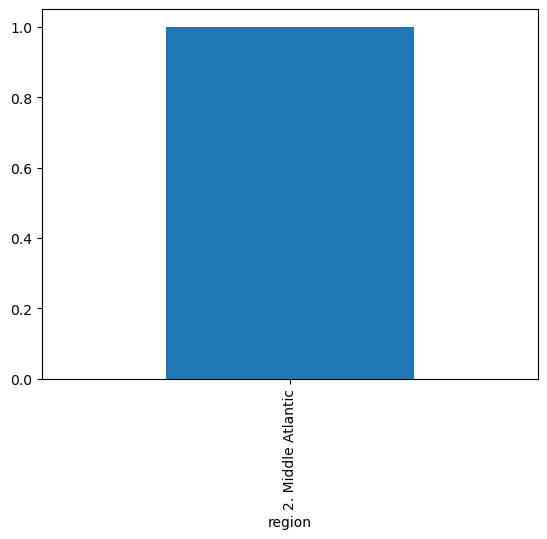

In [56]:
data['region'].value_counts(normalize=True).plot(kind='bar')

In [58]:
data['region'].value_counts()

region
2. Middle Atlantic    3000
Name: count, dtype: int64